In [8]:
import pandas as pd
import numpy as np
from data_clean import data_clean
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

X_train_temp = pd.read_csv('./data/dirty_X_train.csv',index_col = 0)
y_train_temp = pd.read_csv('./data/dirty_y_train.csv',index_col = 0)

X_train = data_clean(X_train_temp,'x')
y_train = data_clean(y_train_temp,'y')
# X_train.describe()

In [13]:
# sns.heatmap(X_train.isin([-9999,-2222,-2222.2,-2,-1111.1,-1111,-1]))

In [9]:
pipe = Pipeline([
    ('sc', StandardScaler() ),
    ('elastic', ElasticNet(max_iter=10000) )
])

params = {
    'elastic__alpha': [.001, .025, .05,.1, .5,.75, 1, 2, 5, 10],
    'elastic__l1_ratio' : [.1, .5, .7, .9, .95, .99, 1]
}

search= GridSearchCV(estimator=pipe,
                    param_grid=params,
                    cv=5,
                    return_train_score=True
                    )
search.fit(X_train, y_train)


/home/will/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8544299457312263, tolerance: 0.8064680995024875
  positive)
/home/will/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elastic',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=10000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
                         

In [10]:
search.best_index_, search.best_params_, search.best_score_

(30, {'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.7}, 0.5308738906859509)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 2559 to 2311
Data columns (total 22 columns):
Population_Size        2512 non-null float64
LBW                    2512 non-null float64
Premature              2512 non-null float64
Under_18               2512 non-null float64
Over_40                2512 non-null float64
Late_Care              2512 non-null float64
MVA                    2512 non-null float64
Suicide                2512 non-null float64
No_HS_Diploma          2512 non-null float64
Unemployed             2512 non-null float64
Sev_Work_Disabled      2512 non-null float64
Major_Depression       2512 non-null float64
Recent_Drug_Use        2512 non-null float64
No_Exercise            2512 non-null float64
Few_Fruit_Veg          2512 non-null float64
High_Blood_Pres        2512 non-null float64
Diabetes               2512 non-null float64
Uninsured              2512 non-null float64
Elderly_Medicare       2512 non-null float64
Disabled_Medicare      2512 non-nul

In [8]:
CV=pd.DataFrame(search.cv_results_)
CV2=CV.sort_values('rank_test_score')
CV2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elastic__alpha,param_elastic__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
30,0.004439,0.000329,0.001854,0.000035,0.5,0.7,"{'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.7}",0.546338,0.472051,0.513078,...,0.530874,0.035468,1,0.539334,0.550746,0.543297,0.522606,0.524365,0.536070,0.010923
29,0.004301,0.000078,0.001809,0.000048,0.5,0.5,"{'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.5}",0.573543,0.304124,0.547369,...,0.522163,0.110714,2,0.569983,0.579659,0.573342,0.553962,0.556704,0.566730,0.009849
36,0.004279,0.000048,0.001855,0.000104,0.75,0.5,"{'elastic__alpha': 0.75, 'elastic__l1_ratio': ...",0.524828,0.450020,0.496480,...,0.507413,0.032740,3,0.515587,0.525043,0.519103,0.498730,0.499786,0.511650,0.010565
31,0.004500,0.000252,0.001849,0.000056,0.5,0.9,"{'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.9}",0.515693,0.442989,0.480949,...,0.497650,0.033106,4,0.507093,0.516705,0.513192,0.487723,0.487891,0.502521,0.012401
32,0.005244,0.000936,0.002423,0.000347,0.5,0.95,"{'elastic__alpha': 0.5, 'elastic__l1_ratio': 0...",0.507251,0.434963,0.471630,...,0.488493,0.032667,5,0.498605,0.507485,0.504686,0.479043,0.478716,0.493707,0.012443


In [30]:
rid=ElasticNet(alpha=.5, l1_ratio=.7)
rid.fit(X_train, y_train)
coeffs=rid.coef_.tolist()
c_ind=list(range(26))
# coeffs=coeffs[0]
coeffs_columns=X_train.columns
coefficients=list(zip(coeffs,coeffs_columns))
coefficients.sort()
type(coefficients)

list

'No_Exercise'

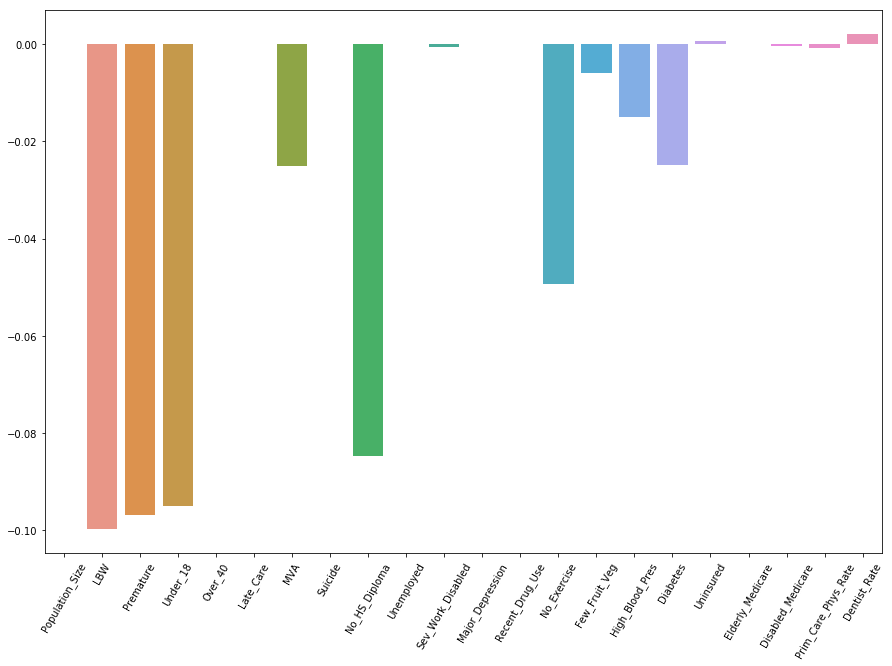

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.barplot(coeffs_columns,coeffs)
